In [15]:
import tensorflow as tf
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

 
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      samplewise_std_normalization = True,
      samplewise_center = True,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255,
      samplewise_std_normalization = True,
      samplewise_center = True)


parent_dir = r'\ECSE484_Fall2020'
validation_dir = os.path.join(parent_dir, 'validation_for_CNN_2')
train_dir =   os.path.join(parent_dir, 'training_for_CNN_2')
 

train_generator = train_datagen.flow_from_directory(
        train_dir,  # this is the target directory
        target_size=(101,101),  # all images will be resized to 150x150
        batch_size= 40,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        validation_dir,  # this is the target directory
        target_size=(101,101),  # all images will be resized to 150x150
        batch_size= 40,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', input_shape=(101,101, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Flatten(), #fully connected
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')     
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#the other way to construct model
#model = Sequential()
#add model layers
#model.add(Conv2D(256,(8,8), activation = 'relu',input_shape = (101,101,3)))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Flatten())
#model.add(Dense(256))# a fully connected layer
#model.add(Activation('softmax'))
#model.add(Dense(2, activation='softmax'))
#model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch= 350,  #steps_per_epoch*batch_size =   700*  20 = 14000
    epochs = 30, 
    validation_data = validation_generator,
    validation_steps = 75, #validation_steps*batch_size =   150 *20 =  3000
    verbose=1)

Found 14000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Epoch 1/30
350/350 [==============================] - 921s 3s/step - loss: 0.4763 - acc: 0.8021 - val_loss: 0.4315 - val_acc: 0.8247
Epoch 2/30
350/350 [==============================] - 921s 3s/step - loss: 0.4048 - acc: 0.8282 - val_loss: 0.6148 - val_acc: 0.7837
Epoch 3/30
350/350 [==============================] - 919s 3s/step - loss: 0.3910 - acc: 0.8362 - val_loss: 0.4215 - val_acc: 0.8260
Epoch 4/30
350/350 [==============================] - 921s 3s/step - loss: 0.3778 - acc: 0.8411 - val_loss: 0.4206 - val_acc: 0.8053
Epoch 5/30
350/350 [==============================] - 917s 3s/step - loss: 0.3673 - acc: 0.8464 - val_loss: 0.4146 - val_acc: 0.8130
Epoch 6/30
350/350 [==============================] - 918s 3s/step - loss: 0.3562 - acc: 0.8513 - val_loss: 0.4030 - val_acc: 0.8297
Epoch 7/30
350/350 [==============================] - 918s 3s/step - loss: 0.3533 - acc: 0.8551 - val_loss: 0.4294 - 

In [16]:
model_path = r'\ECSE484_Fall2020\mymodel_3conv_2FC_dataset2'
model.save(model_path)

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 99, 99, 128)       3584      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 49, 49, 128)       0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 47, 47, 256)       295168    
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 23, 23, 256)       0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 23, 23, 256)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 21, 21, 256)       590080    
__________

In [18]:
parent_dir = r'\ECSE484_Fall2020'
test_dir =   os.path.join(parent_dir, 'testing_for_CNN_2')
test_datagen = ImageDataGenerator(rescale=1./255,
      samplewise_std_normalization = True,
      samplewise_center = True)
test_generator = test_datagen.flow_from_directory(
        test_dir,  # this is the target directory
        target_size=(101,101),  # all images will be resized to 150x150
        batch_size=20,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels
predict_results = model.evaluate(test_generator)

Found 3000 images belonging to 2 classes.
150/150 [==============================] - 46s 306ms/step - loss: 0.2752 - acc: 0.8823


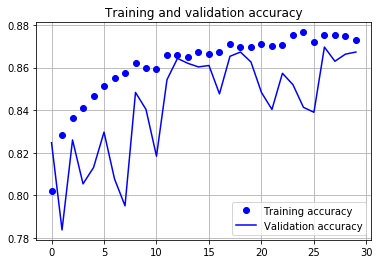

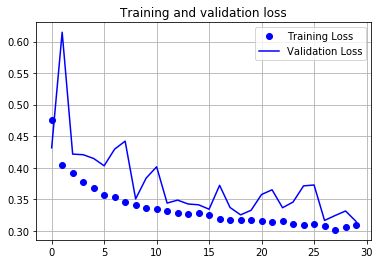

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()
plt.savefig( os.path.join(parent_dir, 'prediction_3conv_2FC_dataset2_acc.png'))
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.savefig( os.path.join(parent_dir, 'prediction_3conv_2FC_dataset2_loss.png'))
plt.show()